**Источник исходных данных:** [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease)

Ссылка на csv-файл на Google Диск: https://drive.google.com/file/d/1WjwFiXI2hM2hRj9rMAX9eq_6TzlkTS97/view?usp=sharing

In [1]:
!pip install gdown==4.6.0

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [2]:
! gdown 1WjwFiXI2hM2hRj9rMAX9eq_6TzlkTS97

Downloading...
From: https://drive.google.com/uc?id=1WjwFiXI2hM2hRj9rMAX9eq_6TzlkTS97
To: /content/hearts.csv
100% 11.3k/11.3k [00:00<00:00, 17.9MB/s]


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.2 MB/s eta 0:00:00


In [12]:
from catboost import CatBoostClassifier

In [11]:
df = pd.read_csv('/content/hearts.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop('target', axis = 1)
y = df['target']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [66]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 101)

In [67]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [68]:
params = {'verbose': 100, 'learning_rate': 0.013}

In [70]:
cat_model = CatBoostClassifier(cat_features = cat_features, **params)

In [71]:
cat_model.fit(X_train, y_train, eval_set = (X_val, y_val))

0:	learn: 0.6852880	test: 0.6854121	best: 0.6854121 (0)	total: 6.19ms	remaining: 6.18s
100:	learn: 0.3097131	test: 0.3416911	best: 0.3416911 (100)	total: 755ms	remaining: 6.72s
200:	learn: 0.2257037	test: 0.2955234	best: 0.2955234 (200)	total: 1.14s	remaining: 4.53s
300:	learn: 0.1811653	test: 0.2749502	best: 0.2748322 (298)	total: 1.54s	remaining: 3.58s
400:	learn: 0.1523315	test: 0.2695310	best: 0.2692591 (373)	total: 1.95s	remaining: 2.92s
500:	learn: 0.1299219	test: 0.2654432	best: 0.2653848 (499)	total: 2.35s	remaining: 2.34s
600:	learn: 0.1099153	test: 0.2649909	best: 0.2644495 (505)	total: 2.72s	remaining: 1.8s
700:	learn: 0.0941010	test: 0.2639473	best: 0.2630914 (679)	total: 3.11s	remaining: 1.33s
800:	learn: 0.0797698	test: 0.2623665	best: 0.2623657 (799)	total: 3.49s	remaining: 866ms
900:	learn: 0.0676130	test: 0.2629881	best: 0.2619742 (881)	total: 3.87s	remaining: 425ms
999:	learn: 0.0588078	test: 0.2669371	best: 0.2619742 (881)	total: 4.25s	remaining: 0us

bestTest = 0.26

In [72]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

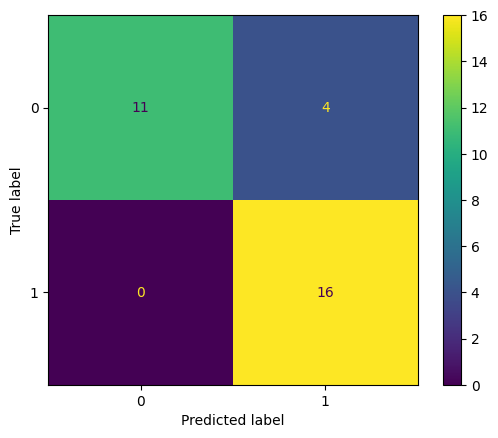

In [73]:
ConfusionMatrixDisplay.from_estimator(cat_model, X_test, y_test)

In [74]:
y_pred = cat_model.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.80      1.00      0.89        16

    accuracy                           0.87        31
   macro avg       0.90      0.87      0.87        31
weighted avg       0.90      0.87      0.87        31



In [76]:
from sklearn.metrics import RocCurveDisplay

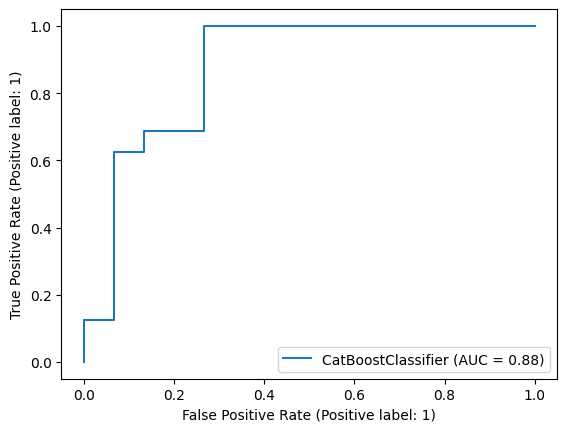

In [78]:
RocCurveDisplay.from_estimator(cat_model, X_test, y_test)